# Hybrid Model 02: Validace modelu (Model Validation)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

import pandas as pd
import matplotlib.pyplot as plt

### Načtení reálných a simulačních dat

In [3]:
# Soubor je načten a přiřazen do proměnné ‚df_sim"
other_path = '../../data/04_HybridModel/hybrid_model.csv'
df_sim = pd.read_csv(other_path, header=0)

In [4]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_sim.head(5)

Prvních 5 řádků datového rámce


,x,y,z,time,stochastic_delay,total_time,cum_delay
0,74,459,1284,39,0,39,0
1,-90,4908,2217,42,0,42,0
2,522,3074,26,37,0,37,0
3,425,2247,2739,37,0,37,0
4,516,3425,1590,35,0,35,0


In [5]:
# Základní deskriptivní statistika simulovaného datasetu
df_sim.describe()

,x,y,z,time,stochastic_delay,total_time,cum_delay
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000
mean,1422.944700,1336.856500,1374.817600,41.15180,4.59600,45.747800,43795.366000
std,1440.916105,1512.725045,805.317921,4.76613,68.18379,68.422704,27884.672863
min,-99.000000,-99.000000,0.000000,31.00000,0.00000,31.000000,0.000000
25%,248.000000,202.000000,676.000000,37.00000,0.00000,37.000000,16810.000000
50%,599.500000,521.000000,1374.500000,41.00000,0.00000,41.000000,43720.000000
75%,2591.250000,2435.000000,2076.000000,44.00000,0.00000,44.000000,68400.000000
max,4599.000000,4949.000000,2749.000000,52.00000,3000.00000,3051.000000,91920.000000


In [6]:
# Soubor je načten a přiřazen do proměnné ‚df_real"
other_path = '../../data/02_DetermModel/model_data_real.csv'
df_real = pd.read_csv(other_path, header=0)


In [7]:
# Zobrazení prvních 5 řádků datasetu
print('Prvních 5 řádků datového rámce')
df_real.head(5)

Prvních 5 řádků datového rámce


,id,type_brick,type,rotation,x,y,z,layer,pallet,dist,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_calc,dist_linear
0,1,CORNER,2,90,220,95,0,1,1,2731,6,17,18,41,42.439435,2680.844083
1,2,HALF,3,90,220,252,0,1,1,2596,3,17,16,36,41.850378,2544.033019
2,4,BASIC,1,90,220,690,0,1,2,2350,6,14,17,37,40.776985,2176.809592
3,6,BASIC,1,90,220,1190,0,1,4,1804,7,14,14,35,38.394577,1796.802716
4,9,BASIC,1,90,220,1940,0,1,7,1454,8,13,24,45,36.867392,1378.767566


In [8]:
# Základní deskriptivní statistika simulovaného datasetu
df_real.describe()

,id,type,rotation,x,y,z,layer,pallet,dist,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_calc,dist_linear
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,69.622642,1.292453,94.245283,1245.122642,1037.443396,379.716981,2.518868,53.386792,2392.462264,8.386792,14.915094,17.660377,40.962264,40.962264,2386.394908
std,37.319586,0.780317,67.329299,1255.988586,1258.426721,272.185013,1.088740,36.333527,864.991497,3.432536,3.447892,6.170416,6.358982,3.774291,908.588253
min,1.000000,1.000000,0.000000,95.000000,95.000000,0.000000,1.000000,1.000000,684.000000,2.000000,6.000000,6.000000,32.000000,33.507586,584.486955
25%,39.250000,1.000000,22.500000,220.000000,220.000000,250.000000,2.000000,22.250000,1670.250000,6.000000,13.000000,14.000000,36.000000,37.810974,1695.860144
50%,67.500000,1.000000,90.000000,502.500000,220.000000,250.000000,2.000000,51.500000,2386.500000,8.000000,15.000000,16.000000,39.000000,40.936248,2432.160678
75%,102.750000,1.000000,180.000000,2190.000000,1565.000000,500.000000,3.000000,86.750000,2920.500000,10.000000,17.000000,20.750000,45.750000,43.266296,2971.442200
max,136.000000,4.000000,180.000000,4002.000000,4440.000000,750.000000,4.000000,120.000000,4439.000000,21.000000,25.000000,38.000000,57.000000,49.892096,4335.827949


### Monte Carlo Validation: Opakované podvzorkování na velikost reality

In [9]:
# Bootstrap vzorkování ze simulace na velikost reálného datasetu
n_real = len(df_real)

sim_samples = []

for _ in range(1000):
    sample = df_sim.sample(n=n_real, replace=True, random_state=122 + _)
    sim_samples.append(sample['total_time'])

### KS test pro každé podvzorkování

In [10]:
# Výpočet KS p-hodnot pro porovnání reálných a simulovaných dat
p_vals = []

for s in sim_samples:
    _, p = ks_2samp(df_real['total_time'], s)
    p_vals.append(p)

### Pravděpodobnost shody modelu

In [11]:
valid_ratio = np.mean(np.array(p_vals) > 0.05)

print("Podíl validních simulací:", valid_ratio)

Podíl validních simulací: 0.722


### Distribuce KS p-hodnoty

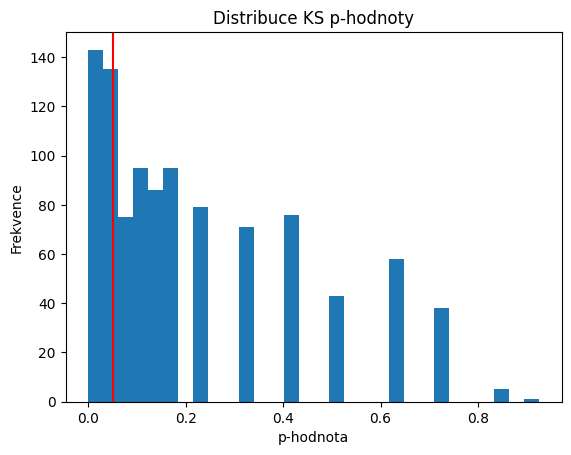

In [12]:
plt.figure()
plt.hist(p_vals, bins=30)
plt.axvline(0.05, color='red')

plt.title("Distribuce KS p-hodnoty")
plt.xlabel("p-hodnota")
plt.ylabel("Frekvence")
plt.show()

### Interpretace (DES validace)
| Podíl | Interpretace |
| ----- | -----------
|0.8 | model VALIDNÍ |
|0.5 – 0.8 | model přijatelný |
|< 0.5 | model nevalidní |

Ve 72.2 % bootstrap vzorků ze simulace nelze statisticky rozlišit simulaci od reality (na hladině významnosti α = 0.05 pomocí KS testu).

Simulace zachycuje trend, ale ne přesně variabilitu reality. **Parametry nejsou ideálně kalibrované**.

### Porovnání průměru a směrodatné odchylky

Reálná data – referenční hodnoty:

In [13]:
# Výpočet průměru a směrodatné odchylky z reálných dat
mean_real = df_real['total_time'].mean()
std_real = df_real['total_time'].std()

print("Real Mean:", mean_real)
print("Real STD:", std_real)

Real Mean: 40.9622641509434
Real STD: 6.358982440763672


Bootstrap ze simulace (na velikost reality):

In [14]:
# velikost reálného datasetu
n_real = len(df_real)

sim_means = []
sim_stds = []

# opakované podvzorkování simulace
for i in range(1000):

    sample = df_sim.sample(
        n=n_real,
        replace=True,
        random_state=122 + i
    )

    sim_means.append(sample['total_time'].mean())
    sim_stds.append(sample['total_time'].std())

### Porovnání průměru

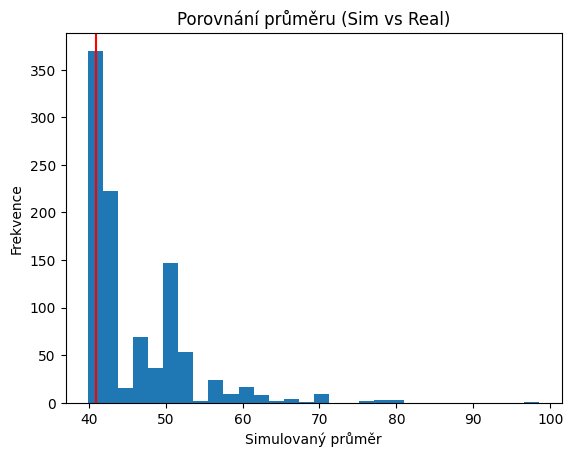

In [15]:
# Histogram průměrů ze simulace s vyznačením průměru reálných dat
plt.figure()

plt.hist(sim_means, bins=30)
plt.axvline(mean_real, color='red')

plt.title("Porovnání průměru (Sim vs Real)")
plt.xlabel("Simulovaný průměr")
plt.ylabel("Frekvence")

plt.show()

### Porovnání STD

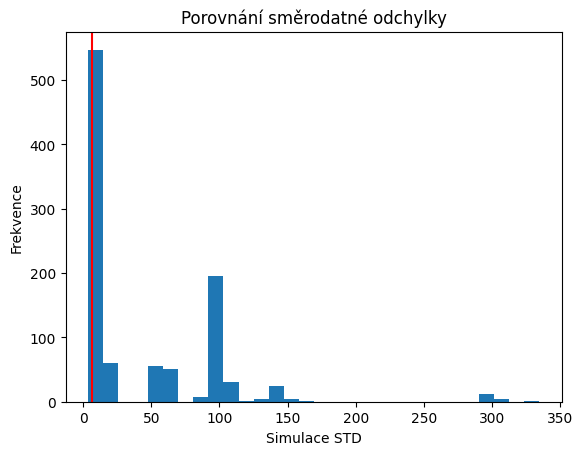

In [16]:
# Histogram STD ze simulace s vyznačením průměru reálných dat
plt.figure()

plt.hist(sim_stds, bins=30)
plt.axvline(std_real, color='red')

plt.title("Porovnání směrodatné odchylky")
plt.xlabel("Simulace STD")
plt.ylabel("Frekvence")

plt.show()

### Kvantilová validace

In [17]:
mean_CI = np.percentile(sim_means, [2.5, 97.5])
std_CI  = np.percentile(sim_stds, [2.5, 97.5])

print("Mean 95% CI:", mean_CI)
print("STD  95% CI:", std_CI)

print("Real mean:", mean_real)
print("Real STD:", std_real)

Mean 95% CI: [40.58466981 62.98301887]
STD  95% CI: [  4.38853464 137.62442429]
Real mean: 40.9622641509434
Real STD: 6.358982440763672


Model je validní, ale rozsah hodnot je moc široký -> **simulace není kalibrovaná**.

### Parametrické porovnání dat

### Welchův t-test

In [18]:
stat, p = ttest_ind(
    df_real['total_time'],
    df_sim['total_time'],
    equal_var=False
)

print("Welch t-test p-value:", p)

Welch t-test p-value: 3.62800304900374e-09


p < 0.05 → simulace má jiný průměr.

### Cohen’s d (velikost efektu)

In [19]:
mean_diff = abs(df_real['total_time'].mean() - df_sim['total_time'].mean())

pooled_std = np.sqrt(
    (df_real['total_time'].std()**2 + df_sim['total_time'].std()**2) / 2
)

d = mean_diff / pooled_std

print("Cohen's d:", d)

Cohen's d: 0.09848675815268022


Cohen's d < 0.2 → zanedbatelný význam

### Neparametrické porovnání (Distribuce)

### Mann–Whitney U test

In [20]:
stat, p = mannwhitneyu(
    df_real['total_time'],
    df_sim['total_time']
)

print("Mann–Whitney p-value:", p)

Mann–Whitney p-value: 0.15363578224656693


Nelze zamítnout nulovou hypotézu. Neexistuje statisticky významný rozdíl mezi mediánem reálných a simulovaných dat.

Simulace realisticky zachycuje centrální tendenci systému.

### Vyhodnocení shody simulovaných a reálných dat

********
**Bootstrap KS test**

0,722

*Interpretace*:

Ve 72.2 % případů nelze statisticky rozlišit simulaci od reality

********
**STD**

Real STD = 6.36
STD 95% CI (Sim) [4.39 ; 137.62]

*Interpretace:*

Reálná směrodatná odchylka je v intervalu, avšak simulace vykazuje nadměrnou variabilitu

*******
**Průměr**

Real Mean = 40.96
Mean 95% CI (Sim) [40.58 ; 62.98]

*Interpretace:*

Reálný průměr se nachází v intervalu simulace

********
**Welch t-test**

p = 3.63 × 10⁻⁹

*Interpretace:*

Statisticky významný rozdíl průměrů (ovlivněn rozdílnou velikostí vzorků).

********
**Cohen’s d**

0.098

*Interpretace:*

Zanedbatelný praktický rozdíl mezi průměry reálných a simulovaných dat


********
**Mann–Whitney U test (neparametrický)**

p = 0.154

*Interpretace:*

p ≫ 0,05 → nelze zamítnout nulovou hypotézu.

Nebyl prokázán statisticky významný rozdíl mezi mediány reálných a simulovaných dat (α = 0.05)

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-27 | 1.1 | Vjačeslav Usmanov| added HM_02_Model_Validation.ipynb |
| 2026-02-16 | 1.2 | Vjačeslav Usmanov| changed HM_02_Model_Validation.ipynb |